## Import package

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [9]:
df=pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.drop('customerID',axis='columns',inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Data Visualization

In [25]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [26]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [27]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [28]:
def checkValues(df, name):
    print("For No : ")
    temp = df[df[name]=='No' ]
    print(temp.shape)
    print(temp["Churn"].value_counts())
    
    print("\nFor Yes : ")
    temp = df[df[name]=='Yes' ]
    print(temp.shape)
    print(temp["Churn"].value_counts())
    
    print("\nFor No Internet Service : ")
    temp = df[df[name]=='No internet service' ]
    print(temp.shape)
    print(temp["Churn"].value_counts())

In [29]:
checkValues(df, "OnlineSecurity")

For No : 
(3498, 20)
No     2037
Yes    1461
Name: Churn, dtype: int64

For Yes : 
(2019, 20)
No     1724
Yes     295
Name: Churn, dtype: int64

For No Internet Service : 
(1526, 20)
No     1413
Yes     113
Name: Churn, dtype: int64


In [30]:
checkValues(df, "OnlineSecurity")

For No : 
(3498, 20)
No     2037
Yes    1461
Name: Churn, dtype: int64

For Yes : 
(2019, 20)
No     1724
Yes     295
Name: Churn, dtype: int64

For No Internet Service : 
(1526, 20)
No     1413
Yes     113
Name: Churn, dtype: int64


In [31]:
checkValues(df, "OnlineBackup")

For No : 
(3088, 20)
No     1855
Yes    1233
Name: Churn, dtype: int64

For Yes : 
(2429, 20)
No     1906
Yes     523
Name: Churn, dtype: int64

For No Internet Service : 
(1526, 20)
No     1413
Yes     113
Name: Churn, dtype: int64


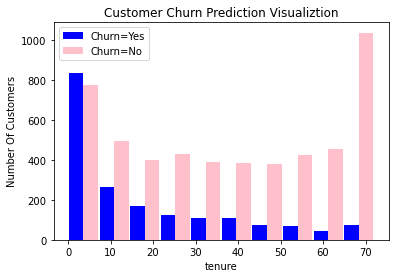

In [32]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue','pink'],label=['Churn=Yes','Churn=No'])
plt.legend()

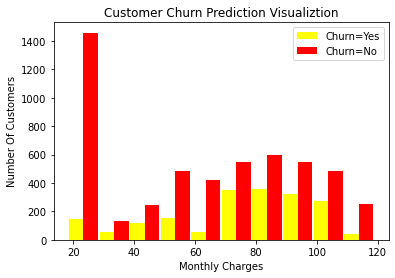

In [33]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['yellow','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [34]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


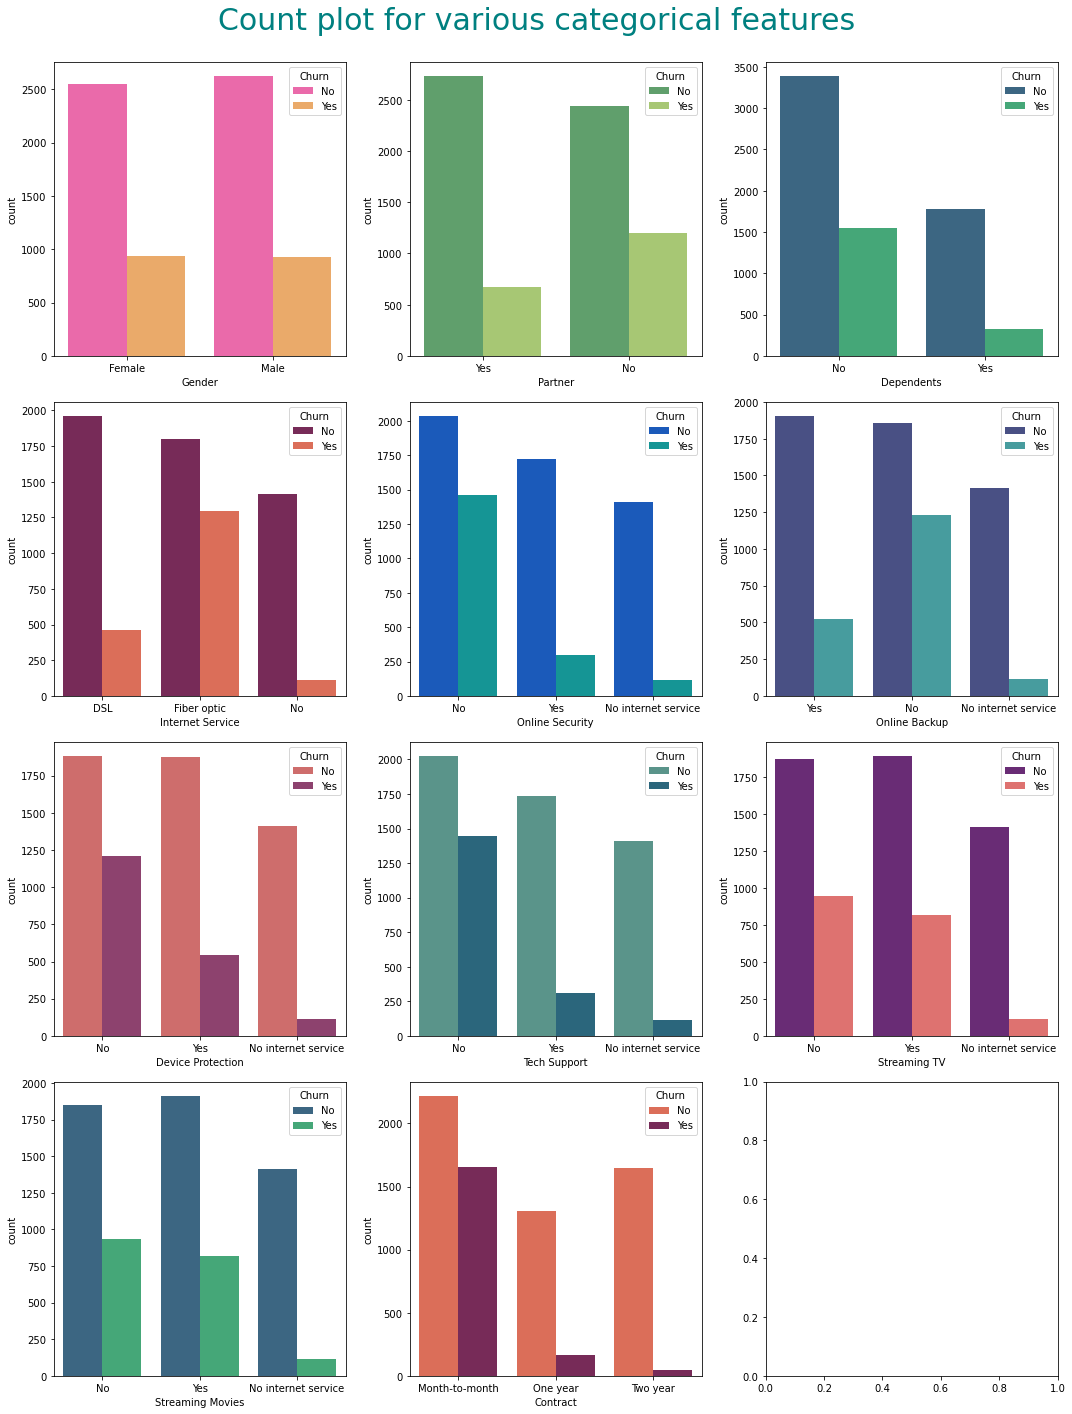

In [37]:
fig, ax = plt.subplots(4, 3, figsize = (15, 20))
plt.suptitle('Count plot for various categorical features\n', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='Partner', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'summer')
ax2.set(xlabel = 'Partner')

ax3 = sns.countplot(x ='Dependents', data= df, hue= 'Churn', ax= ax[0, 2], palette= 'viridis')
ax3.set(xlabel = 'Dependents')

ax4 = sns.countplot(x ='InternetService', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'rocket')
ax4.set(xlabel = 'Internet Service')

ax5 = sns.countplot(x ='OnlineSecurity', data= df, hue= 'Churn', ax= ax[1, 1], palette= 'winter')
ax5.set(xlabel = 'Online Security')

ax6 = sns.countplot(x ='OnlineBackup', data= df, hue= 'Churn', ax= ax[1, 2], palette= 'mako')
ax6.set(xlabel = 'Online Backup')

ax7 = sns.countplot(x ='DeviceProtection', data= df, hue= 'Churn', ax= ax[2, 0], palette= 'flare')
ax7.set(xlabel = 'Device Protection')

ax8 = sns.countplot(x ='TechSupport', data= df, hue= 'Churn', ax= ax[2, 1], palette= 'crest')
ax8.set(xlabel = 'Tech Support')

ax9 = sns.countplot(x ='StreamingTV', data= df, hue= 'Churn', ax= ax[2, 2], palette= 'magma')
ax9.set(xlabel = 'Streaming TV')

ax10 = sns.countplot(x ='StreamingMovies', data= df, hue= 'Churn', ax= ax[3, 0], palette= 'viridis')
ax10.set(xlabel = 'Streaming Movies')

ax11 = sns.countplot(x ='Contract', data= df, hue= 'Churn', ax= ax[3, 1], palette= 'rocket_r')
ax11.set(xlabel = 'Contract')



plt.tight_layout()
plt.show()

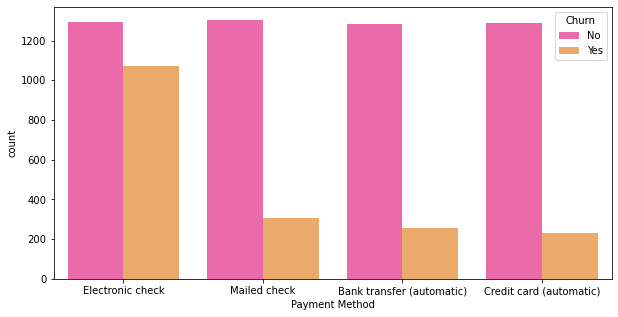

In [38]:
fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', palette= 'spring')
ax.set(xlabel = 'Payment Method')

plt.show()

In [39]:
# # Here Yes == No Internet Services 

# df["OnlineBackup"].replace('No internet service','Yes',inplace=True)
# df["OnlineSecurity"].replace('No internet service','Yes',inplace=True)
# df["DeviceProtection"].replace('No internet service','Yes',inplace=True)
# df["TechSupport"].replace('No internet service','Yes',inplace=True)

In [40]:
# # Here No == No Internet Services 

# df["StreamingTV"].replace('No internet service','No',inplace=True)
# df["StreamingMovies"].replace('No internet service','No',inplace=True)
# df.replace('No phone service','No',inplace=True)

In [41]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [42]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [43]:
df.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5711,Female,1,Yes,No,20,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,90.8,1951,Yes


## Convert Yes and No to 1 or 0

In [45]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [46]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

## One hot encoding for categorical columns

In [47]:
df1 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [48]:
df1.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3423,0,0,No,Yes,1,Yes,No,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
4371,0,0,Yes,Yes,13,Yes,Yes,No,No,No,...,0,0,1,0,1,0,1,0,0,0


In [49]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                                object
Churn                                       object
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [50]:
df1.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [51]:
df1.iloc[488].TotalCharges

' '

### So there is some white space(" ") , we should remove that

In [52]:
pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [53]:
df1[pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,1,0,Yes,Yes,0,No,No,Yes,No,Yes,...,1,0,0,0,0,1,1,0,0,0
753,0,0,No,Yes,0,Yes,No,No,No,No,...,0,0,1,0,0,1,0,0,0,1
936,1,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,...,1,0,0,0,0,1,0,0,0,1
1082,0,0,Yes,Yes,0,Yes,Yes,No,No,No,...,0,0,1,0,0,1,0,0,0,1
1340,1,0,Yes,Yes,0,No,No,Yes,Yes,Yes,...,1,0,0,0,0,1,0,1,0,0
3331,0,0,Yes,Yes,0,Yes,No,No,No,No,...,0,0,1,0,0,1,0,0,0,1
3826,0,0,Yes,Yes,0,Yes,Yes,No,No,No,...,0,0,1,0,0,1,0,0,0,1
4380,1,0,Yes,Yes,0,Yes,No,No,No,No,...,0,0,1,0,0,1,0,0,0,1
5218,0,0,Yes,Yes,0,Yes,No,No,No,No,...,0,0,1,0,1,0,0,0,0,1
6670,1,0,Yes,Yes,0,Yes,Yes,No,Yes,Yes,...,1,0,0,0,0,1,0,0,0,1


### Remove rows with space in TotalCharges

In [54]:
df1 = df1[df1.TotalCharges!=' ']
df1.shape

(7032, 27)

In [55]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   object 
 3   Dependents                               7032 non-null   object 
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   object 
 6   MultipleLines                            7032 non-null   object 
 7   OnlineSecurity                           7032 non-null   object 
 8   OnlineBackup                             7032 non-null   object 
 9   DeviceProtection                         7032 non-null   object 
 10  TechSupport                              7032 no

In [57]:
df1.corr()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.001819,-0.005285,0.013779,-0.000048,-0.007584,0.011189,-0.004745,0.003251,-0.007755,0.003603,0.015973,-0.001632,-0.000844,-0.013199
SeniorCitizen,0.001819,1.000000,0.015683,0.219874,0.102411,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
tenure,-0.005285,0.015683,1.000000,0.246862,0.825880,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.013779,0.219874,0.246862,1.000000,0.651065,-0.161368,0.787195,-0.763191,0.058933,0.004810,-0.073256,0.042410,0.030055,0.271117,-0.376568
TotalCharges,-0.000048,0.102411,0.825880,0.651065,1.000000,-0.052190,0.360769,-0.374878,-0.446776,0.170569,0.358036,0.186119,0.182663,-0.060436,-0.294708
InternetService_DSL,-0.007584,-0.108276,0.013786,-0.161368,-0.052190,1.000000,-0.641636,-0.379912,-0.065226,0.047300,0.030924,0.024760,0.051222,-0.104293,0.042754
InternetService_Fiber optic,0.011189,0.254923,0.017930,0.787195,0.360769,-0.641636,1.000000,-0.465736,0.243014,-0.076809,-0.209965,-0.022779,-0.050552,0.335763,-0.305984
InternetService_No,-0.004745,-0.182519,-0.037529,-0.763191,-0.374878,-0.379912,-0.465736,1.000000,-0.217824,0.038061,0.217542,-0.001094,0.001870,-0.284608,0.319694
Contract_Month-to-month,0.003251,0.137752,-0.649346,0.058933,-0.446776,-0.065226,0.243014,-0.217824,1.000000,-0.570053,-0.621933,-0.180159,-0.204960,0.330879,0.006209
Contract_One year,-0.007755,-0.046491,0.202338,0.004810,0.170569,0.047300,-0.076809,0.038061,-0.570053,1.000000,-0.288843,0.057629,0.067590,-0.109546,0.000197


## Scaling

In [58]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

## Train Test Split

In [59]:
X = df1.drop(["Churn", "gender", "Partner", "PhoneService", "Contract_Month-to-month", "Contract_One year", "Contract_Two year"], axis='columns')
y = df1["Churn"]

In [60]:
y.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

## Handle Imabalance Dataset

In [67]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=28)
# X_res, y_res = sm.fit_resample(X, y)

## Build a model (ANN) in tensorflow/keras

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 20), (1407, 20), (5625,), (1407,))

In [72]:
import tensorflow as tf
from tensorflow import keras

In [76]:
model = keras.Sequential([
    keras.layers.Dense(40, input_shape=(20,), activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss'
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


BATCH_SIZE = 50
EPOCHS = 40

history = model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=0,
    callbacks = [early_stopping, checkpoint])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [77]:
model.evaluate(X_test, y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [79]:
y_pred = model.predict(X_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [80]:
y_pred[0]

NameError: name 'y_pred' is not defined

In [81]:
y_pred = y_pred.reshape(y_pred.shape[0])

NameError: name 'y_pred' is not defined

In [31]:
data[data['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [82]:
y_pred = y_pred.round()

NameError: name 'y_pred' is not defined

In [83]:
y_pred[0]

NameError: name 'y_pred' is not defined

In [84]:
history.history.keys()

NameError: name 'history' is not defined

In [85]:
dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

NameError: name 'dict_keys' is not defined

In [86]:
plt.figure(figsize=(10, 6))


train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

NameError: name 'history' is not defined

<Figure size 720x432 with 0 Axes>

NameError: name 'history' is not defined

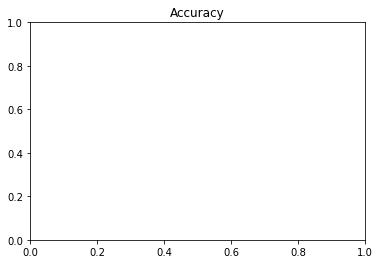

In [87]:
fig, ax = plt.subplots()


ax.set_title("Accuracy")
ax.plot(history.history['auc'], label="Training accuracy")
ax.plot(history.history['val_auc'], label="Validation accuracy")
plt.legend()
plt.show()